# reproduce the coinflip example

In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

In [2]:
# Prepare the input data
n_tosses = 100
head_fraction = 0.7  # this is our real pi
# tosses = np.zeros(n_tosses)
# tosses[0:int(n_tosses*head_fraction)] = 1
# make bernoulli out of reandom number

tosses = np.random.random(size=n_tosses)
tosses = np.where(tosses < head_fraction, 1,0)
print(tosses)

[1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1]


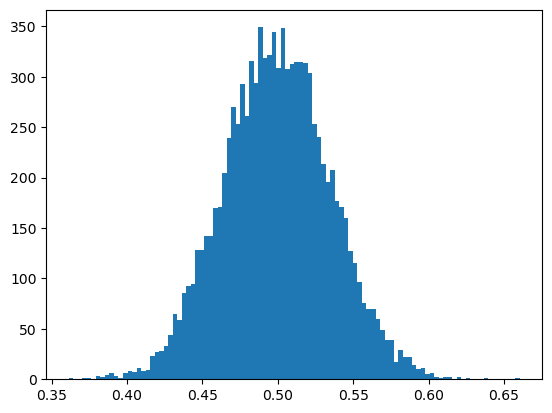

ValueError: Can only convert xarray dataarray, xarray dataset, dict, netcdf filename, numpy array, pystan fit, emcee fit, pyro mcmc fit, numpyro mcmc fit, cmdstan fit csv filename, cmdstanpy fit to InferenceData, not TensorVariable

In [13]:
# set up the model
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    pi = pm.Beta("pi", alpha=100, beta=100)
    # plot pi distribution (how to plot real pdf?)
    plt.hist(pm.draw(pi,draws=10000), bins=100)
    plt.show()

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Bernoulli("Y_obs", p=pi, observed=tosses)

In [14]:
# MCMC sampling
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample(draws=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [pi]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 21 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


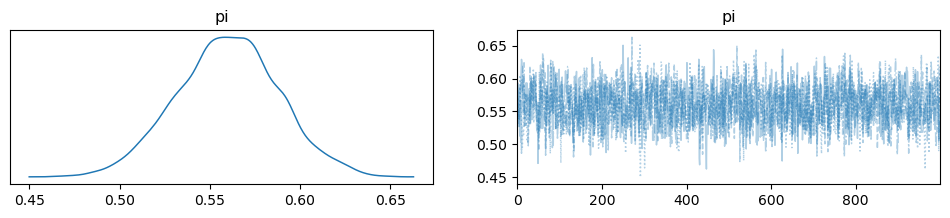

In [12]:
# Analyse the result
az.plot_trace(idata, combined=True);